In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [2]:
myproject = pd.read_csv('FIFA project data.csv')

myproject

C:\Users\OLUWATOSIN\AppData\Local\Temp\ipykernel_13368\3345525342.py:1: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  myproject = pd.read_csv('FIFA project data.csv')


,ID,Name,Nationality,Age,Overall,Potential,Club,Contract End,Contract duration(years),Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2021,17.0,"RW, ST, CF",...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2022,4.0,"ST, LW",...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2023,9.0,GK,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2023,8.0,"CAM, CM",...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2022,5.0,"LW, CAM",...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,\n\n\n\nWuhan Zall,2022,4.0,CB,...,Medium,Medium,1,64,28,26,38,48,51,NaN
18975,258760,B. Hough,England,17,47,67,\n\n\n\nOldham Athletic,2021,1.0,CM,...,Medium,Medium,1,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,England,18,47,65,\n\n\n\nDerry City,2020,1.0,CM,...,Medium,Medium,1,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2022,2.0,RW,...,Medium,Medium,1,58,49,41,49,30,44,NaN


In [3]:
myproject.isnull().sum()

ID                0
Name              0
Nationality       0
Age               0
Overall           0
               ... 
PAS               0
DRI               0
DEF               0
PHY               0
Hits           2595
Length: 75, dtype: int64

In [4]:
def hits(value):
    value_str = str(value)
    if 'K' in value_str:
        return int(float(value_str.replace('K', '').replace(',', '').strip()) * 1000)
    try:
        return int(value_str)
    except ValueError:
        return None
myproject['Hits'] = myproject['Hits'].apply(hits)


In [5]:
myproject.head()

,ID,Name,Nationality,Age,Overall,Potential,Club,Contract End,Contract duration(years),Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2021,17.0,"RW, ST, CF",...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2022,4.0,"ST, LW",...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2023,9.0,GK,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2023,8.0,"CAM, CM",...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2022,5.0,"LW, CAM",...,High,Medium,5,91,85,86,94,36,59,595.0


In [6]:
myproject['Hits']= myproject['Hits'].fillna(myproject['Hits'].mean())

In [7]:
myproject.describe()

,ID,Age,Overall,Potential,Contract duration(years),Height(CM),Weight(KG),BOV,Attacking,Crossing,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,3.664419,181.187681,75.019021,66.751726,248.938142,49.688392,...,2.940513,2.364982,1.091628,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,26.605796
std,27141.054157,4.710520,6.968999,6.114635,2.274857,6.866527,7.073542,6.747193,74.299428,18.131153,...,0.668449,0.766114,0.361760,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,119.510702
min,41.000000,16.000000,47.000000,47.000000,0.000000,155.000000,50.000000,48.000000,42.000000,6.000000,...,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1.000000
25%,210135.000000,21.000000,61.000000,67.000000,2.000000,176.000000,70.000000,62.000000,222.000000,38.000000,...,3.000000,2.000000,1.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,3.000000
50%,232418.000000,25.000000,66.000000,71.000000,3.000000,181.000000,75.000000,67.000000,263.000000,54.000000,...,3.000000,2.000000,1.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,7.000000
75%,246922.500000,29.000000,70.000000,75.000000,5.000000,186.000000,80.000000,71.000000,297.000000,63.000000,...,3.000000,3.000000,1.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000,26.605796
max,259216.000000,53.000000,93.000000,95.000000,23.000000,206.000000,110.000000,93.000000,437.000000,94.000000,...,5.000000,5.000000,5.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,8400.000000


## QUESTION 1A

Text(0.5, 0, 'Nationality')

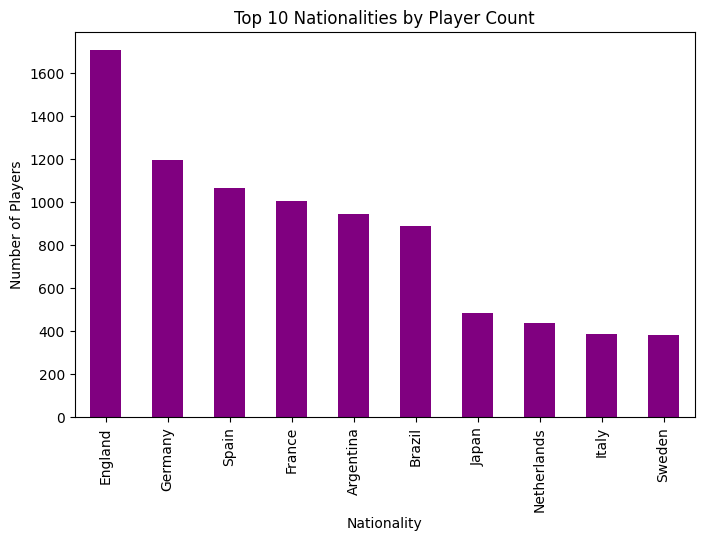

In [8]:
nationality = myproject['Nationality'].value_counts().head(10)

plt.figure(figsize=(8, 5))
nationality.plot(kind='bar', color='purple')
plt.title('Top 10 Nationalities by Player Count')
plt.ylabel('Number of Players')
plt.xlabel('Nationality')



In [9]:
myproject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18979 non-null  int64  
 1   Name                      18979 non-null  object 
 2   Nationality               18979 non-null  object 
 3   Age                       18979 non-null  int64  
 4   Overall                   18979 non-null  int64  
 5   Potential                 18979 non-null  int64  
 6   Club                      18979 non-null  object 
 7   Contract End              18979 non-null  object 
 8   Contract duration(years)  18979 non-null  float64
 9   Positions                 18979 non-null  object 
 10  Height(CM)                18979 non-null  int64  
 11  Weight(KG)                18979 non-null  int64  
 12  Preferred Foot            18979 non-null  object 
 13  BOV                       18979 non-null  int64  
 14  Best P

In [10]:
def convert(wage):
    if isinstance(wage, str):
        wage = wage.strip()
        if 'k' in wage.lower():
            return float(wage[:-1]) * 1000
        else:
            return float(wage)
    elif isinstance(wage, (float, int)):
        return wage
    else:
        return None
    
myproject['Wage'] = myproject['Wage'].apply(convert)


In [11]:
myproject['Best Position'].unique()

array(['RW', 'ST', 'GK', 'CAM', 'LW', 'CB', 'CDM', 'CF', 'CM', 'RB', 'LB',
       'LM', 'RM', 'LWB', 'RWB'], dtype=object)

In [12]:
mapping = {
    'CF': 'Forward',
    'RW': 'Forward',
    'ST': 'Forward',
    'LW': 'Forward',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'CAM': 'Midfielder',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'RB': 'Defender',
    'CB': 'Defender',
    'LB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
    'GK': 'Goalkeeper'
}

myproject['Position'] = myproject['Best Position'].map(mapping)


Text(0.5, 0, 'Position')

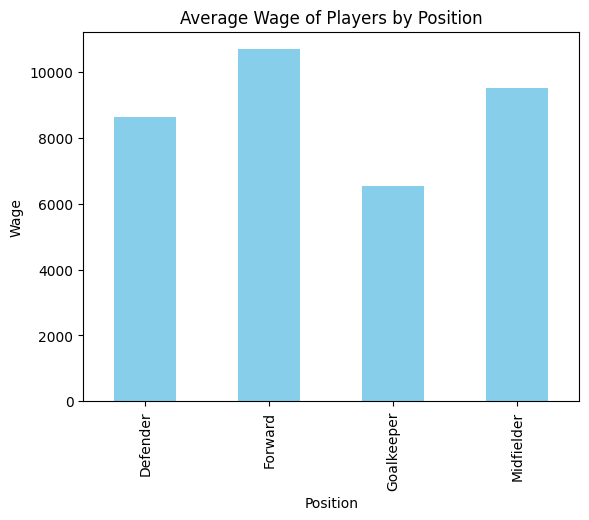

In [13]:
myproject.groupby('Position')['Wage'].mean().plot(kind='bar', color='skyblue')

plt.title('Average Wage of Players by Position')
plt.ylabel('Wage')
plt.xlabel('Position')


Text(0, 0.5, 'Frequency')

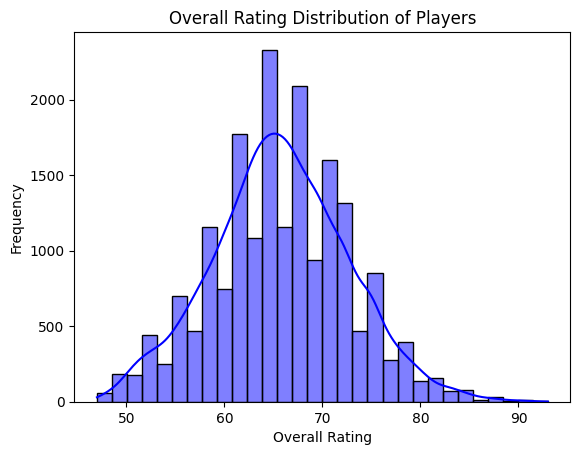

In [14]:
sns.histplot(myproject['Overall'], bins=30, kde=True, color='blue')
plt.title('Overall Rating Distribution of Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')


## QUESTION 1B

In [15]:
myproject['Nationality'].describe()

count       18979
unique        164
top       England
freq         1705
Name: Nationality, dtype: object

In [16]:
myproject['Nationality'].value_counts()

Nationality
England      1705
Germany      1195
Spain        1065
France       1003
Argentina     943
             ... 
Barbados        1
Singapore       1
Nicaragua       1
Malaysia        1
Indonesia       1
Name: count, Length: 164, dtype: int64

Text(0, 0.5, 'Nationality')

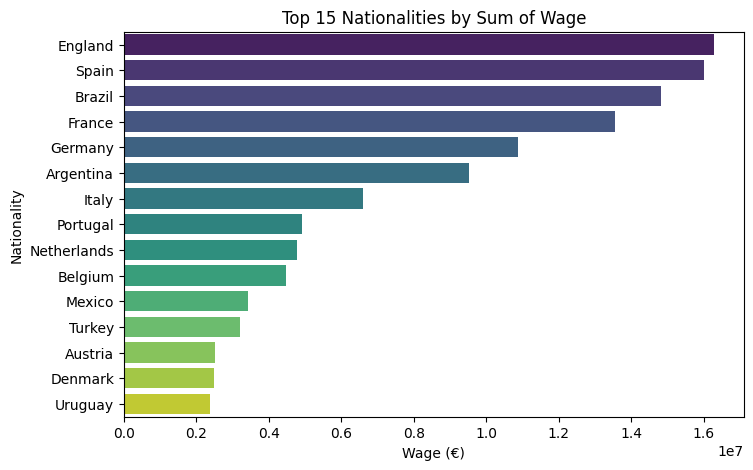

In [17]:
top15 = myproject.groupby('Nationality')['Wage'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.barplot(x=top15.values, y=top15.index, palette='viridis', hue=top15.index, dodge=False)

plt.title('Top 15 Nationalities by Sum of Wage')
plt.xlabel('Wage (€)' )
plt.ylabel('Nationality')

In [18]:
myproject['Wage'].describe()

count     18979.000000
mean       9092.062279
std       19707.021089
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      560000.000000
Name: Wage, dtype: float64

Text(0.5, 0, 'Wage (€)')

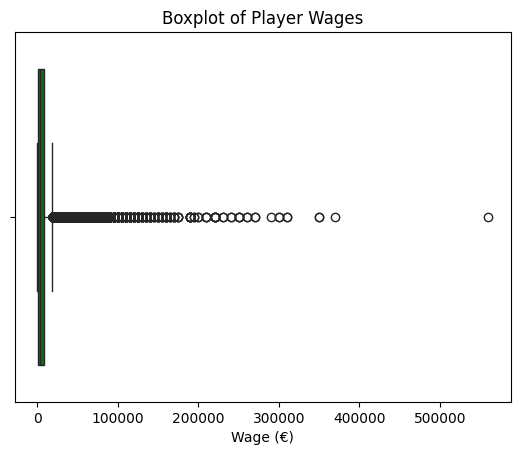

In [19]:
sns.boxplot(x=myproject['Wage'], color='green')
plt.title('Boxplot of Player Wages')
plt.xlabel('Wage (€)')



In [20]:
def category(weight):
    if weight < 60:
        return 'Under 60kg'
    elif 60 <= weight < 70:
        return 'Under 70kg'
    elif 70 <= weight < 80:
        return 'Under 80kg'
    elif 80 <= weight < 90:
        return 'Under 90kg'
    elif 90 <= weight < 100:
        return 'Under 100kg'
    elif 100 <= weight < 110:
        return 'Under 110kg'
    elif 110 <= weight < 120:
        return 'Under 120kg'
    else:
        return 'Over 120kg'

myproject['Weight_Category'] = myproject['Weight(KG)'].apply(category)



In [21]:
myproject.head()

,ID,Name,Nationality,Age,Overall,Potential,Club,Contract End,Contract duration(years),Positions,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Position,Weight_Category
0,158023,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2021,17.0,"RW, ST, CF",...,5,85,92,91,95,38,65,771.0,Forward,Under 80kg
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2022,4.0,"ST, LW",...,5,89,93,81,89,35,77,562.0,Forward,Under 90kg
2,200389,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2023,9.0,GK,...,3,87,92,78,90,52,90,150.0,Goalkeeper,Under 90kg
3,192985,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2023,8.0,"CAM, CM",...,4,76,86,93,88,64,78,207.0,Midfielder,Under 80kg
4,190871,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2022,5.0,"LW, CAM",...,5,91,85,86,94,36,59,595.0,Forward,Under 70kg


Text(0, 0.5, 'Frequency')

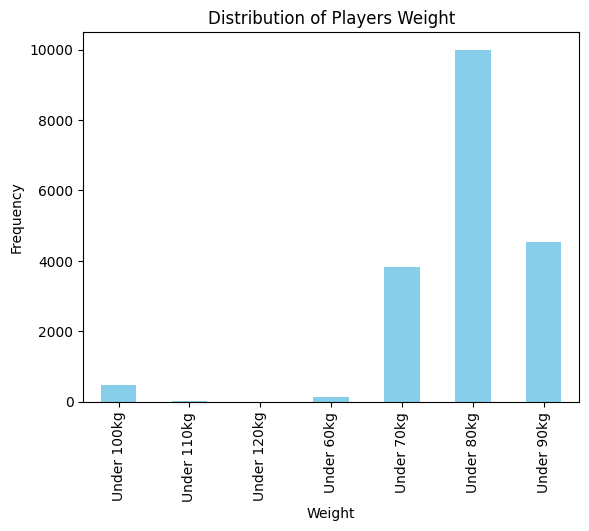

In [22]:
myproject.groupby('Weight_Category')['Name'].count().plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Distribution of Players Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')


## QUESTION 2

In [23]:
myproject.groupby('Position')['Wage'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Defender,6389.0,8632.970731,17127.332613,0.0,1000.0,3000.0,8000.0,300000.0
Forward,3242.0,10697.023442,26092.485709,0.0,1000.0,3000.0,9000.0,560000.0
Goalkeeper,2075.0,6553.614458,15827.100367,0.0,750.0,2000.0,6000.0,260000.0
Midfielder,7273.0,9504.152344,19432.850624,0.0,1000.0,3000.0,9000.0,370000.0


Text(0, 0.5, 'Wage (in currency units)')

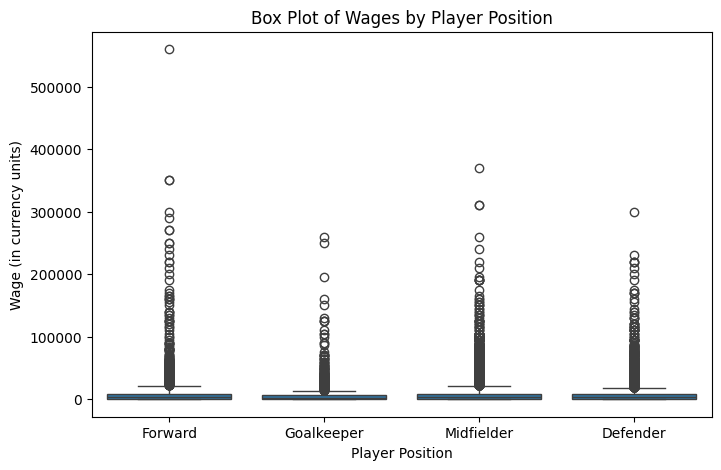

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=myproject, x='Position', y='Wage')
plt.title('Box Plot of Wages by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Wage (in currency units)')

In [25]:
myproject.columns

Index(['ID', 'Name', 'Nationality', 'Age', 'Overall', 'Potential', 'Club',
       'Contract End', 'Contract duration(years)', 'Positions', 'Height(CM)',
       'Weight(KG)', 'Preferred Foot', 'BOV', 'Best Position', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'D

In [26]:
def convert(value):
    if isinstance(value, str):
        value = value.strip()
        if 'm' in value.lower():
            return float(value[:-1]) * 1000000
        elif 'k' in value.lower():
            return float(value[:-1]) * 1000
        else:
            try:
                return float(value) 
            except ValueError:
                return None  
    elif isinstance(value, (float, int)):
        return value 
    else:
        return None 

myproject['Value'] = myproject['Value'].apply(convert)


In [27]:
def convert(value):
    if isinstance(value, str):
        value = value.strip()
        if 'm' in value.lower():
            return float(value[:-1]) * 1000000 
        elif 'k' in value.lower():
            return float(value[:-1]) * 1000 
        else:
            try:
                return float(value)
            except ValueError:
                return None  
    elif isinstance(value, (float, int)):
        return value
    else:
        return None 
myproject['Release Clause'] = myproject['Release Clause'].apply(convert)


Text(0.5, 1.0, 'Correlation Heatmap of Wage with Other Features')

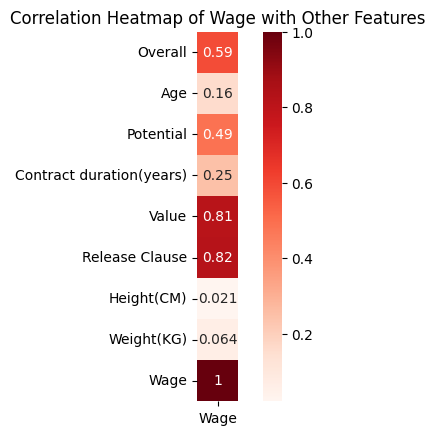

In [28]:
features = ['Overall', 'Age', 'Potential','Contract duration(years)','Value','Release Clause','Height(CM)','Weight(KG)', 'Wage']

wg = myproject[features].corr(method='pearson')

sns.heatmap(wg[['Wage']], annot=True, cmap='Reds', square=True)
plt.title('Correlation Heatmap of Wage with Other Features')



In [29]:
ds = [group['Wage'].values for name, group in myproject.groupby('Nationality')]



In [30]:
f_stat, p_value = stats.f_oneway(*ds)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


F-Statistic: 6.2464881560736165
P-Value: 1.419245107970798e-119


In [31]:
clb = [group['Wage'].values for name, group in myproject.groupby('Club')]



In [32]:
f_stat, p_value = stats.f_oneway(*clb)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


F-Statistic: 42.26341769675025
P-Value: 0.0


In [33]:
pst = [group['Wage'].values for name, group in myproject.groupby('Position')]



In [34]:
f_stat, p_value = stats.f_oneway(*pst)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


F-Statistic: 20.925239751302094
P-Value: 1.5769584591729247e-13


In [35]:
myproject

,ID,Name,Nationality,Age,Overall,Potential,Club,Contract End,Contract duration(years),Positions,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Position,Weight_Category
0,158023,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2021,17.0,"RW, ST, CF",...,5,85,92,91,95,38,65,771.000000,Forward,Under 80kg
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2022,4.0,"ST, LW",...,5,89,93,81,89,35,77,562.000000,Forward,Under 90kg
2,200389,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2023,9.0,GK,...,3,87,92,78,90,52,90,150.000000,Goalkeeper,Under 90kg
3,192985,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2023,8.0,"CAM, CM",...,4,76,86,93,88,64,78,207.000000,Midfielder,Under 80kg
4,190871,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2022,5.0,"LW, CAM",...,5,91,85,86,94,36,59,595.000000,Forward,Under 70kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,\n\n\n\nWuhan Zall,2022,4.0,CB,...,1,64,28,26,38,48,51,26.605796,Defender,Under 70kg
18975,258760,B. Hough,England,17,47,67,\n\n\n\nOldham Athletic,2021,1.0,CM,...,1,64,40,48,49,35,45,26.605796,Midfielder,Under 70kg
18976,252757,R. McKinley,England,18,47,65,\n\n\n\nDerry City,2020,1.0,CM,...,1,63,39,44,46,40,53,26.605796,Midfielder,Under 80kg
18977,243790,Wang Zhen'ao,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2022,2.0,RW,...,1,58,49,41,49,30,44,26.605796,Forward,Under 70kg


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = myproject[['Age', 'Overall', 'Potential', 'Contract duration(years)', 'Value', 'Release Clause', 'Height(CM)', 'Weight(KG)']]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                   Variable          VIF
0                     const  1291.302892
1                       Age     4.094725
2                   Overall     6.818143
3                 Potential     5.228601
4  Contract duration(years)     1.091802
5                     Value    15.495925
6            Release Clause    16.825430
7                Height(CM)     2.536535
8                Weight(KG)     2.673474


In [51]:
X = myproject[['Age', 'Overall', 'Potential','Contract duration(years)','Value','Height(CM)','Weight(KG)']]
Y = myproject['Wage']


In [52]:
X= sm.add_constant(X)

In [53]:
model= sm.OLS(Y,X).fit()

In [54]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     6204.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:18:39   Log-Likelihood:            -2.0331e+05
No. Observations:               18979   AIC:                         4.066e+05
Df Residuals:                   18971   BIC:                         4.067e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## QUESTION 3

Text(0.5, 1.0, 'Height and Weight Impact')

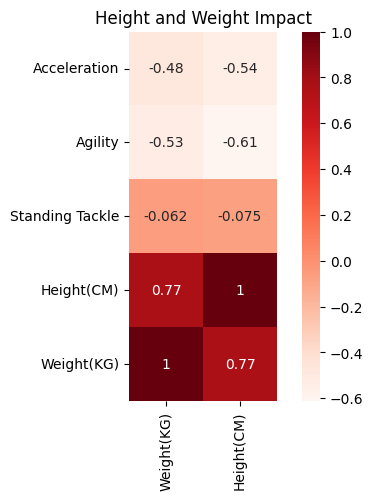

In [40]:
attr= ['Acceleration', 'Agility','Standing Tackle','Height(CM)','Weight(KG)']

wm = myproject[attr].corr(method='pearson')

sns.heatmap(wm[['Weight(KG)','Height(CM)']], annot=True, cmap='Reds', square=True)
plt.title('Height and Weight Impact')

In [41]:
X = myproject[['Acceleration', 'Agility', 'Standing Tackle']]
y = myproject['Weight(KG)']

In [42]:
x= sm.add_constant(X)

In [43]:
model= sm.OLS(y,x).fit()

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Weight(KG)   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2573.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:34:32   Log-Likelihood:                -60820.
No. Observations:               18979   AIC:                         1.216e+05
Df Residuals:                   18975   BIC:                         1.217e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              91.6987      0.210    4

In [45]:
X = myproject[['Acceleration', 'Agility', 'Standing Tackle']]
y = myproject['Height(CM)']

In [46]:
x= sm.add_constant(X)

In [47]:
model= sm.OLS(y,x).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Height(CM)   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     3891.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:34:32   Log-Likelihood:                -58946.
No. Observations:               18979   AIC:                         1.179e+05
Df Residuals:                   18975   BIC:                         1.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             199.7011      0.190   10